### Take a testcase ratio

In [2]:
# reference: https://python-graph-gallery.com/2d-density-plot/
from NTM import *

from copy import deepcopy
import os

dir_name = 'heatmaps'
create_directory(dir_name)

with_heuristic = False
ratio = (26, 63, 47, 43, 7, 70)
N = sum(ratio)
k = len(ratio)

R = [('r{}'.format(idx+1), item) for idx, item in enumerate(ratio)]
T = genMix(R, 4)
if with_heuristic:
    T = hda(T)
A = ntm(T, [0,0])

timeCount = getTimeCount(A)
cellCount = getCellCount(A)
valveSet, valveCount, actuationCount = getValveCount(A)

print ('RATIO: ', ratio)
print ('Time: ', timeCount)
print ('Cell: ', cellCount)
print ('ValveCount: ', valveCount)
print ('ActuationCount: ', actuationCount)

print ("ValveSet: ")
for k, v in valveSet.items():
    print (k, v)

RATIO:  (26, 63, 47, 43, 7, 70)
Time:  10
Cell:  22
ValveCount:  31
ActuationCount:  48
ValveSet: 
(-0.5, 0.0) 2
(-1.0, 0.5) 1
(-0.5, 1.0) 1
(0.0, 0.5) 1
(0.5, -1.0) 1
(1.0, -1.5) 1
(0.5, -2.0) 1
(0.0, -1.5) 1
(-1.0, -1.5) 2
(-1.5, -2.0) 3
(-2.0, -1.5) 3
(-1.5, -1.0) 2
(-1.0, -2.5) 1
(-1.5, -3.0) 1
(-2.0, -2.5) 3
(-2.5, -2.0) 3
(-3.0, -1.5) 1
(-2.5, -1.0) 1
(-2.5, -3.0) 3
(-3.0, -2.5) 3
(-2.0, -3.5) 1
(-2.5, -4.0) 1
(-3.0, -3.5) 2
(-3.5, -3.0) 2
(-4.0, -2.5) 1
(-3.5, -2.0) 1
(-3.5, -4.0) 1
(-4.0, -3.5) 1
(0.0, -0.5) 1
(-0.5, -1.0) 1
(-1.0, -0.5) 1


### Generate Valve 2-D Data

In [3]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Generate valve data
x, y = [], []
for k, v in valveSet.items():
    for i in range(v):
        x.append(k[0])
        y.append(k[1])
x, y = np.array(x), np.array(y)

### Generate Heatmap

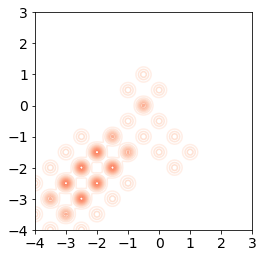

In [4]:
# Custom it with the same argument as 1D density plot
ax = sns.kdeplot(x, y, cmap="Reds",  
                 bw=.15,# cbar=True,
                 vmin=-0.005, vmax=1) #decreasing vmax will darken the color
ax.set(ylim=(-4, 3), xlim=(-4, 3))
ax.tick_params(labelsize=14)
plt.yticks(np.arange(-4, 4, 1))
plt.xticks(np.arange(-4, 4, 1))
# ax.set_facecolor('#fef2eb')
plt.gca().set_aspect('equal', adjustable='box')

file_name = os.path.join(dir_name, 'WITH_heatmap_type2.png')
plt.savefig(file_name, transparent=True,
            dpi=256, bbox_inches = 'tight', pad_inches = 0.1)

## Rough

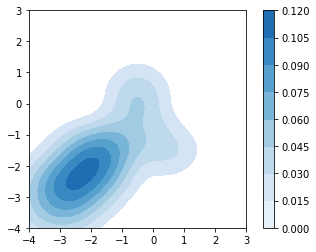

In [11]:
# Some features are characteristic of 2D: color palette and wether or not color the lowest range
ax = sns.kdeplot(x, y, cmap="Blues",
                 shade=True,  cbar=True, shade_lowest=False,
                 vmin=-0.005, vmax=0.15)
ax.set(ylim=(-4, 3), xlim=(-4, 3))
# ax.set_facecolor('#f0f6fd')
plt.gca().set_aspect('equal', adjustable='box')

/home/btpbatch2/miniconda3/envs/ap/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'square'
  s)


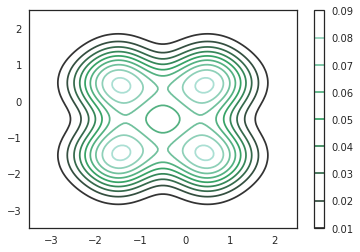

In [78]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

# Basic 2D density plot
sns.set_style("white")
sns.kdeplot(x, y,cbar=True, square=True)

/home/btpbatch2/miniconda3/envs/ap/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/btpbatch2/miniconda3/envs/ap/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


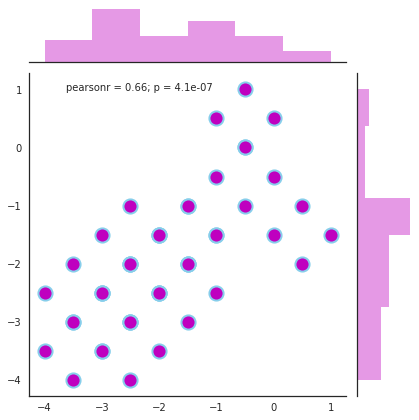

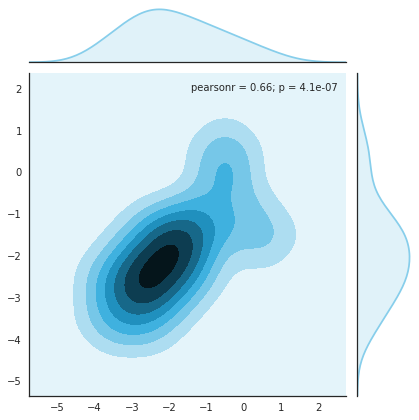

In [7]:
# Then you can pass arguments to each type:
sns.jointplot(x, y, kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)
 
# Custom the color
sns.set(style="white", color_codes=True)
sns.jointplot(x, y, kind='kde', color="skyblue")

/home/btpbatch2/miniconda3/envs/ap/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/btpbatch2/miniconda3/envs/ap/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/btpbatch2/miniconda3/envs/ap/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/btpbatch2/miniconda3/envs/ap/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and

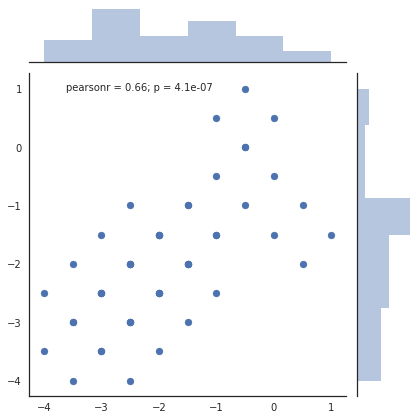

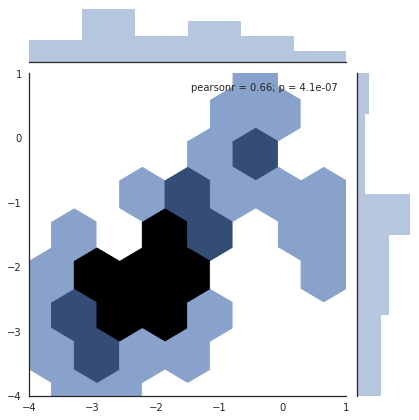

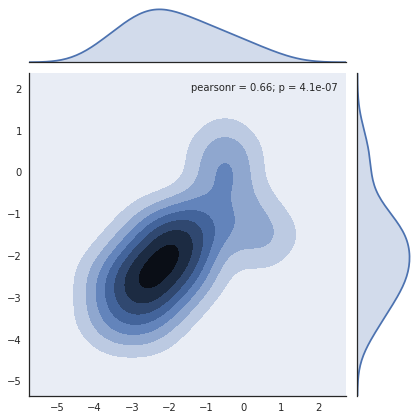

In [6]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x, y, kind='scatter')
sns.jointplot(x, y, kind='hex')
sns.jointplot(x, y, kind='kde')


### Generate Valve 2-D Data